# **Problem set 4** - Machine Learning for Physics and Astronomy 2023/2024, UvA

- The total sheet gives 27 points
- Deadline for submitting your results is **Wed, 8/5/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Chapter 7: Basic Deep learning - The Multi Layer Perceptron （14 points）

### 7.1 Pytorch Basics (4 points)

In this exercise, we will be exploring some basic aspects of `pytorch`, its `autograd` functionality, and connecting the neural network theory to code.

Consider the folloiwng simple linear model. This is equivalent to the Logistic Regression model from last week, with 5 inputs and 1 output. We now take a look at a print out of its internal parameters. Now is a good time to (re-)familiarize yourself with the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Before asking questions, make sure you seek solutions by searching the official documentation link provided above (or try using other tools like large language models and popular search engines).

In [ ]:
# define a machine learning "model", here a simple linear layer
model = torch.nn.Linear(5, 1)

# iterate over all parameters in the model
for par in model.parameters():
    # print parameter (pytorch can print out the parameters nicely for us)
    print(par)

    # print shape and gradient
    print('shape:', par.shape, 'gradient:', par.grad)
    print('----')

Parameter containing:
tensor([[-0.1234, -0.3804,  0.3662,  0.0056,  0.1910]], requires_grad=True)
shape: torch.Size([1, 5]) gradient: None
----
Parameter containing:
tensor([-0.1357], requires_grad=True)
shape: torch.Size([1]) gradient: None
----


1. (1 point) What is the mathematical definition of this model? How do the printed parameters of the model relate to the mathematical defintion, i.e. what does each parameter represent?  What is `par.grad` showing, and why is it `None`?  Why does it make sense that `requires_grad` is initialized to `True`?

YOUR SOLUTION

These are the parameters in one layer
\begin{equation*}
y=\vec{w} \cdot \vec{x} +b
\end{equation*}
where the first 'par' with shape $\displaystyle ( 5,)$ is the weight $\displaystyle \vec{w}$, and the second one with shape $\displaystyle ( 1,) \ $is the bias $\displaystyle b$.

'par.grad' stores the gradient of the loss function with respect to the parameter. Without any backward propagation, there's no gradient and thus it's set to be

`par.grad = None`

But with

`requires_grad=True`

it allows PyTorch to automaticaly keep track of operations involving these parameters	.

Now let us provide an input tensor $x$ for our model and compute the gradients with respect to our parameters. This is done via the `.backward()` call.

In [ ]:
x = torch.tensor([1., 2., 3., 4., 5.])
model = torch.nn.Linear(5, 1)
y = model(x)
y.backward()
for par in model.parameters():
    print(par, par.shape, par.grad)

Parameter containing:
tensor([[0.4255, 0.2085, 0.1955, 0.1309, 0.3342]], requires_grad=True) torch.Size([1, 5]) tensor([[1., 2., 3., 4., 5.]])
Parameter containing:
tensor([0.3238], requires_grad=True) torch.Size([1]) tensor([1.])


2. (1 point) Analytically, what are the gradients that the above code calculates? This should stem from your model definition. Note that `par.grad` is no longer None. What information does `par.grad` contain?

YOUR SOLUTION

the gradients that the above code calculates is
\begin{equation*}
grad=\frac{\partial \boldsymbol{y}}{\partial \boldsymbol{w}}
\end{equation*}
Considering it's a linear relation
\begin{gather*}
\frac{\partial \boldsymbol{y}}{\partial \boldsymbol{w}} =\frac{\partial (\boldsymbol{w} \cdotp \boldsymbol{x} +b)}{\partial \boldsymbol{w}} =\boldsymbol{x}\\
\frac{\partial \boldsymbol{y}}{\partial b} =1
\end{gather*}
is the input vector itself.

So the `par.grad` is no longer `None` but contains the gradients.


3. (1 point) Let's now switch to an ever so slightly more complex model: a multi-layer perceptron (MLP) with two hidden layers (with 10 and 4 hidden neurons). What is the mathemtatical defintion of the following model, which is defined using `nn.Sequential`?  Inspect its internal parameters. How are the internal parameters of the model related to the mathematical defintion you wrote down?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

In [ ]:
# YOUR CODE HERE
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: \n{param}\n")

Layer: 0.weight | Size: torch.Size([10, 2]) | Values: 
Parameter containing:
tensor([[ 0.0744, -0.3517],
        [-0.6604,  0.5309],
        [ 0.6326,  0.3263],
        [ 0.1427, -0.0466],
        [ 0.4893,  0.5131],
        [-0.2976, -0.1056],
        [ 0.6809, -0.1018],
        [-0.3518,  0.1570],
        [-0.6021, -0.5635],
        [-0.6269,  0.4137]], requires_grad=True)

Layer: 0.bias | Size: torch.Size([10]) | Values: 
Parameter containing:
tensor([-0.5109,  0.1077, -0.5500,  0.1082, -0.5555,  0.0464, -0.1936,  0.1119,
         0.1845, -0.6635], requires_grad=True)

Layer: 2.weight | Size: torch.Size([4, 10]) | Values: 
Parameter containing:
tensor([[ 0.0316,  0.1921,  0.2156, -0.0436,  0.1529,  0.2399,  0.1291, -0.0229,
         -0.0059, -0.1303],
        [-0.2844,  0.3086,  0.0176,  0.0888,  0.2283, -0.0132,  0.0859, -0.0820,
          0.1377, -0.1272],
        [ 0.2707,  0.0700, -0.0008, -0.0557,  0.2881, -0.0795,  0.0518,  0.0323,
          0.1604, -0.1554],
        [-0.2513,

YOUR ANSWER HERE

This is a multi-layer neural network with 2 hidden layer. \ For each hidden layer
\begin{gather*}
z_{i} =w_{i} \cdotp h_{i-1} +b_{i}\\
where\ h_{i} =ReLU( z_{i}) ,\ h_{0} =x\ and\ y=\sigma ( z_{3})
\end{gather*}
and the parameters are


*   Weights $\displaystyle W_{1} ,W_{2} ,W_{3}$ respectivle possess the shape $\displaystyle ( 10,2) ,( 4,10) ,( 1,4)$

*   Bias have $\displaystyle ( 10,) ,( 4,) ,( 1,)$



4. (0.5 point) Run different random tensors generated with `torch.randn(...)` through the previous model. Start with tensors of the shape (2,), (1,2),(9, 2), (2, 4, 2). How are input shapes connected to output shapes? What is the role of the last dimension and what constraints do we have there?

*Hint: Consider the case of training a neural network, i.e. passing the neural network many individual examples. In that case, what do the first dimension(s) represent?*

In [ ]:
# YOUR SOLUTION

input_shapes = [
    (2,),
    (1, 2),
    (9, 2),
    (2, 4, 2),
]

# Run the model with different input shapes and print the outputs
for shape in input_shapes:
    x = torch.randn(shape)
    output = model(x)
    print(f"Input shape: {shape} -> Output shape: {output.shape}")

Input shape: (2,) -> Output shape: torch.Size([1])
Input shape: (1, 2) -> Output shape: torch.Size([1, 1])
Input shape: (9, 2) -> Output shape: torch.Size([9, 1])
Input shape: (2, 4, 2) -> Output shape: torch.Size([2, 4, 1])


YOUR SOLUTION

Due to the tensor muliply rules, the neural network convert the last dimension of input vectors `axis = -1` into a scalar.

 The last dimension of the input tensor represents the feature dimension. It must match the number of input features expected by the first layer of the model (torch.nn.Linear(2, 10) expects 2 features). The last dimension of the input tensor must match the input size of the first layer (2 in this case).

5. (0.5 points) Give one additional shape that would lead to an error when tried and explain why!

YOUR SOLUTION

shape like  (ax1,ax2,...,999). This does not satisfy the tensor multiplication rule: the dimensions of the last axis do not match
$999 \neq 2$

**Usage** of AI: *COMMENT HERE*

model.named_parameters() is a function given by gpt, which helps visulize the output of nn parameters of each layer.

### 7.2 Classification! From logistic regression to classification with MLPs (5 points)


This exercise will show you how to solve more complicated classification tasks using MLPs with PyTorch. We will here use our own toy simulator to generate training data sets.  The simulator that is implemented below produces points in the 2-dim hypercube and classifies them as y = 0, 1 in a ring-segment pattern.  There are two parameters that you can play with to change that pattern.

Below is an example code that targets this classification problem with a neural network using one (output) node with a sigmoid activation function, similar to what was used for the logistic regression in exercise sheets 3 and 4. Try to run and understand the code.

In [ ]:
torch.manual_seed(0)

In [ ]:
def simulator(nsamples, contrast = 7, scale = 7):
    X = torch.rand(nsamples, 2)
    R = torch.sqrt(X[:,0]**2 + X[:,1]**2)
    p = torch.sigmoid(torch.cos(R*scale)*contrast)
    y = torch.bernoulli(p)
    return X, y

X, y = simulator(3000)  # Data set

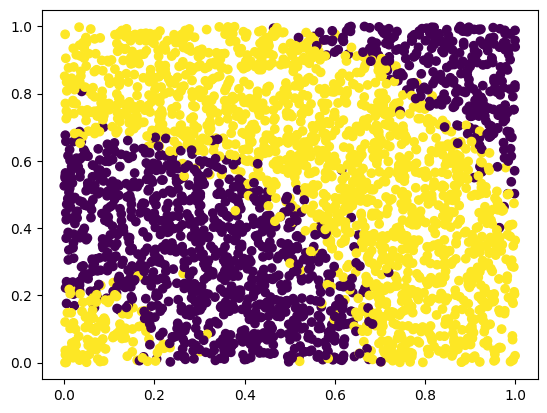

In [ ]:
# This is our data
plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
# We scale the coordinates to mean zero and standard deviation one, which makes it easier to train the neural networks.
X_scaled = X - X.mean(axis=0)
X_scaled = X_scaled/X_scaled.std(axis=0)

In [ ]:
# This our logistic regression model with linear basis functions, using the compact `nn.Sequential` technique to define the network.
model = torch.nn.Sequential(torch.nn.Linear(2, 1), torch.nn.Sigmoid())

Here we are using the so called [Adam](https://arxiv.org/abs/1412.6980) optimizer. It's update step is slightly more sophisticated than the basic stochastic gradient descent optimizer used in the last exercise sheet. Instead of `torch.optim.SGD`, it can be accessed as `torch.otpim.Adam`.

In [ ]:
# We now define loss function and optimizer
criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

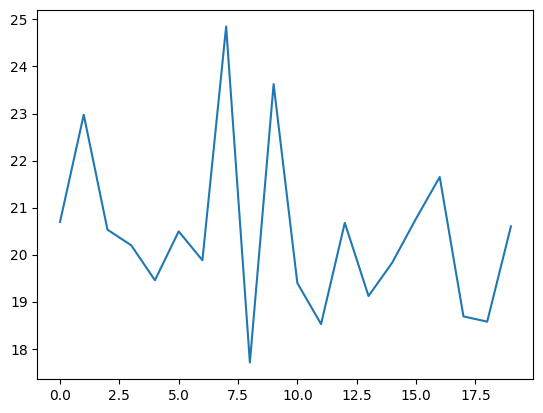

In [ ]:
# This is a standard training loop
loss_hist = []
nbatch = 32  # number of training examples per minibatch
nepochs = 20 # numer of epoches, i.e. times we iterate through the entire dataset

for epoch in range(nepochs):
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]


    for i in range(len(X)//nbatch):
        X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
        y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_scaled_batch).squeeze(1)

        # compute loss
        loss = criterion(y_pred, y_batch)
        # backward pass
        loss.backward()
        optimizer.step()

    loss_hist.append(loss.item())
plt.plot(loss_hist)

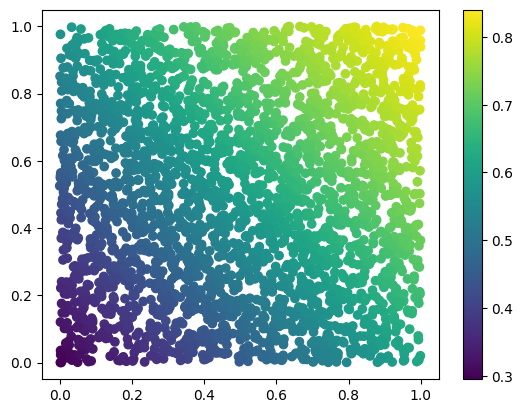

In [ ]:
y_pred = model(X_scaled).squeeze(1).detach().numpy()
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.colorbar()

This is actually a pretty bad result, since it does not reflect our training data.  This is not a surprise, since the simple linear regression model with linear basis functions cannot generate a pattern like our training data. We will improve now in the next steps.

1.  (1 point) Explain briefly (one sentence each and in your own words) the role of the following components of the training loop: `nbatch`, `//`, `zero_grad()`, `.backward()`, `optimizer.step()`?

YOUR SOLUTION

`nbatch`: This sets how many data points we use in each small group during training.

`//`: This is used to divide the total number of data points by the group size to find out how many groups we have.

`zero_grad()`: This clears out old gradient values so they don't mess up the new calculations.

`.backward()`: This calculates how much each weight in the model should change to make the predictions better.

`optimizer.step()`: This actually changes the weights in the model based on the calculations to improve the predictions.

2. (1 point) We saw above that the output of our model does not look like what we want. To judge this more quantitatively, write an accuracy function, similar to exercise sheet 2, and quantify the performance of the model using the 3000 points used for training. Use `np.around` to round the predictions of the network, compare with the truth, and calculate the fraction of matches.

*Hint*: The accuracy here is measured by the frequency in which the model gives higher probability to the true label.

In [ ]:
def accuracy(model, data, target):
    # YOUR SOLUTION
    # Get model predictions
    predictions = model(data)

    # Convert predictions to rounded values (0 or 1)
    predictions_rounded = torch.round(predictions)

    # Ensure predictions_rounded and target have the same shape by using .squeeze()
    predictions_rounded = predictions_rounded.squeeze()
    target = target.squeeze()

    # Calculate the number of correct predictions using torch.eq
    correct_predictions = torch.eq(predictions_rounded, target).sum().item()

    # Calculate accuracy as the fraction of correct predictions
    accuracy = correct_predictions / len(target)

    return accuracy

# YOUR CODE HERE

train_accuracy = accuracy(model, X_scaled, y)
print(f'Accuracy on the training data: {train_accuracy:.4f}')

Accuracy on the training data: 0.7353


3. (3 points) Improve the above model by introducing an additional hidden layer. Try out 2, 5, 25 and 50 as sizes for the single hidden layer. Use a ReLU activation function (`torch.nn.ReLU()`). How does it affect the result qualitatively? Evaluate this using the accuracy function from above.

Accuracy on the training data: 0.7617
Accuracy on the training data: 0.7657
Accuracy on the training data: 0.7733
Accuracy on the training data: 0.7600


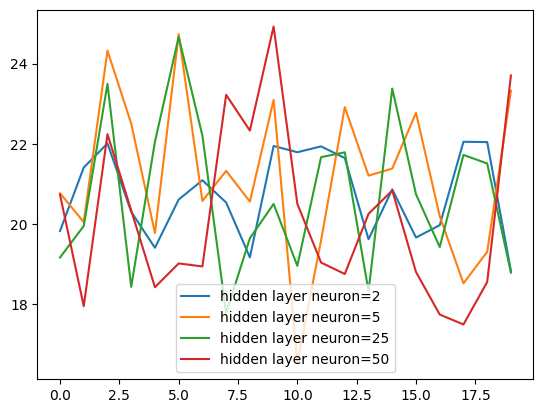

In [ ]:
# YOUR SOLUTION
def model_1_hidden(hidden_neuron,data,target):
    model_hidden = torch.nn.Sequential(
        torch.nn.Linear(2, hidden_neuron), torch.nn.ReLU(),
        torch.nn.Linear(hidden_neuron, 1), torch.nn.Sigmoid(),
    )
    criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
    optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

    loss_hist = []
    nbatch = 32  # number of training examples per minibatch
    nepochs = 20 # numer of epoches, i.e. times we iterate through the entire dataset

    for epoch in range(nepochs):
        # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
        shuffle = np.random.permutation(len(X))
        X_shuffled = X_scaled[shuffle]
        y_shuffled = y[shuffle]


        for i in range(len(X)//nbatch):
            X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
            y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

            optimizer.zero_grad()

            # forward pass
            y_pred = model(X_scaled_batch).squeeze(1)

            # compute loss
            loss = criterion(y_pred, y_batch)
            # backward pass
            loss.backward()
            optimizer.step()

        loss_hist.append(loss.item())
    plt.plot(loss_hist,label = 'hidden layer neuron={}'.format(hidden_neuron))
    plt.legend()

    # Accuracy
    train_accuracy = accuracy(model, X_scaled, y)
    print(f'Accuracy on the training data: {train_accuracy:.4f}')

for h in [2, 5, 25 ,50]:
    model_1_hidden(h,X_scaled,y)


**Usage** of AI: *COMMENT HERE*

GPT explains what each **kwag means.

### 7.3 Regression! Testing the universal function approximation theorem (5 points)


In this exercise we will use a single layer perceptron to perform regression. We will, in this way, test the universal function approximation theorem by checking if such a simple neural network can approximate the cosine function well.

1. (1 point) Generate training data from a cosine function, `y = cos(x*4)`, with 1000 values of `x` uniformly drawn from [-1, 1]. Plot your function.

*Hint: Remember to convert your x and y data to torch tensors, if you create them using numpy.*

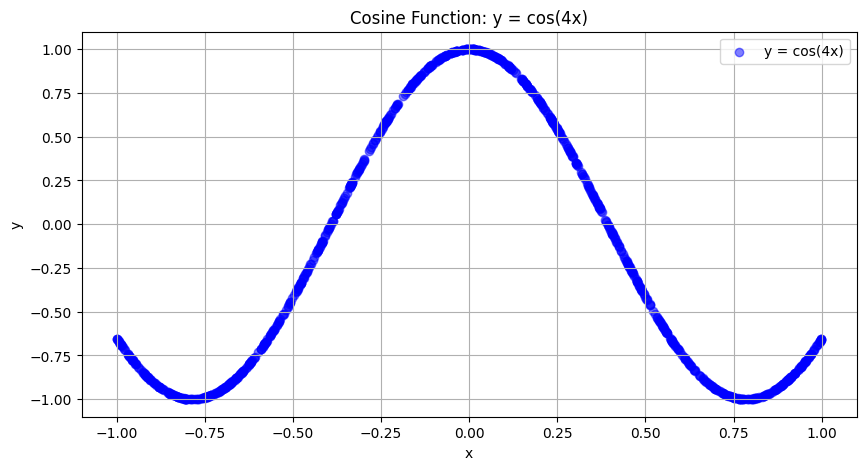

In [ ]:
# YOUR COD EHRE
def cosine_sample(num):
    X = np.random.uniform(-1, 1, num)
    Y = np.cos(4*X)
    return X,Y

x_values, y_values = cosine_sample(1000)
plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values, label='y = cos(4x)', color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine Function: y = cos(4x)')
plt.legend()
plt.grid(True)
plt.show()

2. (2 points) Define a network that implements a simple single-layer perceptron that maps general 1-dim inputs (x) onto general 1-dim outputs (y), with `nhidden` hidden parameters in the hidden layer. Use the ReLu activation function after the hidden layer. Instead of using `nn.Sequential` like above, complete the network class below. You have encountered this way of defining models before in section 6.3 on exercise sheet 4.

In [ ]:
class SimplePerceptron(torch.nn.Module):
    def __init__(self, nhidden):
        super(SimplePerceptron, self).__init__()
        # Define layers
        self.hidden = torch.nn.Linear(1, nhidden)  # Hidden layer
        self.relu = torch.nn.ReLU()                # ReLU activation function
        self.output = torch.nn.Linear(nhidden, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)  # Apply hidden layer
        x = self.relu(x)    # Apply ReLU activation
        x = self.output(x)  # Apply output layer
        return x

3. (2 points) Train that model to recover the cosine curve. You should do so by minimizing the mean square error between the predicted function and the ground truth cosine function defined above. What is the minimum number of hidden parameters that you need for results that you would consider satisfactory?

*Hint: Pytorch has a built-in MSE loss you may use, check the documentation.  It helps to randomize the ordering of the data to improve training. Consider a minibatch size of 16 or 32, about 100-200 epochs, and a small enough learning rate.*

Training model with 2 hidden neurons...
Epoch [20/200], Loss: 0.4701
Epoch [40/200], Loss: 0.3316
Epoch [60/200], Loss: 0.2545
Epoch [80/200], Loss: 0.6355
Epoch [100/200], Loss: 0.3291
Epoch [120/200], Loss: 0.5600
Epoch [140/200], Loss: 0.1480
Epoch [160/200], Loss: 0.3121
Epoch [180/200], Loss: 0.4551
Epoch [200/200], Loss: 0.5029
Final Loss with 2 hidden neurons: 0.3857
Training model with 4 hidden neurons...
Epoch [20/200], Loss: 0.6594
Epoch [40/200], Loss: 0.6232
Epoch [60/200], Loss: 0.3496
Epoch [80/200], Loss: 0.4608
Epoch [100/200], Loss: 0.3959
Epoch [120/200], Loss: 0.6186
Epoch [140/200], Loss: 0.4810
Epoch [160/200], Loss: 0.2619
Epoch [180/200], Loss: 0.5842
Epoch [200/200], Loss: 0.3112
Final Loss with 4 hidden neurons: 0.3860
Training model with 8 hidden neurons...
Epoch [20/200], Loss: 0.0576
Epoch [40/200], Loss: 0.0881
Epoch [60/200], Loss: 0.0284
Epoch [80/200], Loss: 0.0195
Epoch [100/200], Loss: 0.0140
Epoch [120/200], Loss: 0.0223
Epoch [140/200], Loss: 0.0376


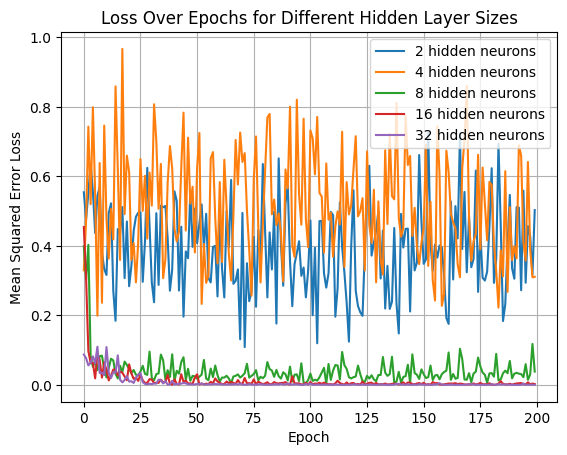

Best number of hidden neurons: 32 with loss 0.0011


NameError: name 'Y' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
# YOUR SOLUTION
# input data
X_tensor = torch.tensor(x_values, dtype=torch.float32).unsqueeze(1)
Y_tensor = torch.tensor(y_values, dtype=torch.float32).unsqueeze(1)

hidden_neurons = np.logspace(1,5,num=5,base=2,dtype=np.int16)
best_hidden_neurons = None
best_loss = float('inf')
num_epochs = 200
minibatch_size = 32

for nhidden in hidden_neurons:
    print(f"Training model with {nhidden} hidden neurons...")
    model = SimplePerceptron(nhidden=nhidden)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    losses = []

    for epoch in range(num_epochs):
        model.train()

        # Shuffle the dataset at each epoch
        perm = torch.randperm(X_tensor.size(0))  # permutation?
        X_tensor_shuffled = X_tensor[perm]
        Y_tensor_shuffled = Y_tensor[perm]

        for i in range(0, X_tensor.size(0), minibatch_size):
            X_batch = X_tensor_shuffled[i:i + minibatch_size]
            Y_batch = Y_tensor_shuffled[i:i + minibatch_size]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            loss.backward()
            optimizer.step()

        losses.append(loss.item())

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Plot the loss over epochs
    plt.plot(losses, label=f'{nhidden} hidden neurons')

    # Evaluate the model on the entire dataset
    model.eval()
    with torch.no_grad():
        y_pred = model(X_tensor).numpy()

    final_loss = criterion(torch.tensor(y_pred), Y_tensor).item()
    print(f'Final Loss with {nhidden} hidden neurons: {final_loss:.4f}')

    if final_loss < best_loss:
        best_loss = final_loss
        best_hidden_neurons = nhidden

# Show loss plot
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss Over Epochs for Different Hidden Layer Sizes')
plt.legend()
plt.grid(True)
plt.show()

print(f'Best number of hidden neurons: {best_hidden_neurons} with loss {best_loss:.4f}')

# Retrain and Plot the Best Model
best_model = SimplePerceptron(nhidden=best_hidden_neurons)
optimizer = torch.optim.Adam(best_model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    best_model.train()

    # Shuffle the dataset at each epoch
    perm = np.random.permutation(len(X_tensor))
    X_tensor_shuffled = X_tensor[perm]
    Y_tensor_shuffled = Y_tensor[perm]

    for i in range(0, X_tensor.size(0), minibatch_size):
        X_batch = X_tensor_shuffled[i:i + minibatch_size]
        Y_batch = Y_tensor_shuffled[i:i + minibatch_size]

        optimizer.zero_grad()
        outputs = best_model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_tensor).numpy()

plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values, label='Original Data', color='blue', alpha=0.5)
plt.scatter(x_values, y_pred, label='Predicted Data', color='red', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original vs Predicted Data')
plt.legend()
plt.grid(True)
plt.show()


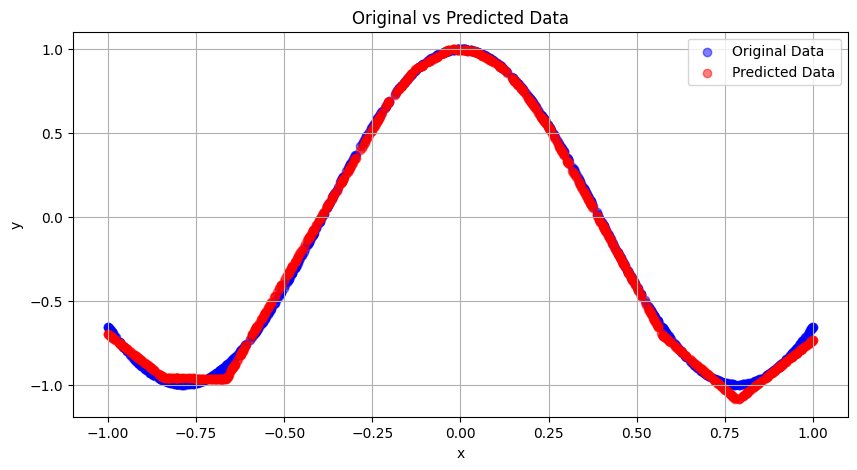

**Usage** of AI: *COMMENT HERE*

GPT did the last question. I modify it so that it uses the basic configuration above.

## Chapter 8: Convolutional Neural Networks (13 points)

In this exercise, we will be building a convolutional network in PyTorch to recognize handwritten digits as given in the MNIST dataset.

Required reading (*pior* to starting the exercises!):

https://nextjournal.com/gkoehler/pytorch-mnist (Excellent blog post on which these exercises are based)

https://en.wikipedia.org/wiki/MNIST_database (Description of the dataset we will be working with)

### 8.1 Convolutions (1 point)

1. (1 point)
  Before implementing convolutions using pytorch below, let us make sure we understand what they are doing, by hand.

  Consider the convolutional kernel

  $$
  K = \begin{pmatrix}
    1 & 2 \\
    3 & 4
  \end{pmatrix} \,,
  $$

  and the  input data

  $$
  I = \begin{pmatrix}
    -1 & 1 & 0 \\
    1 & -1 & -1 \\
    1 & 1 & 1
  \end{pmatrix} \,.
  $$

  By hand, compute the convolution $I \circledast K$ without padding (also known as 'valid', so your output should be a 2x2 matrix).

YOUR ANSWER HERE



2. (2 point) Convolutional layers are the basic building block of deep convolutional neural networks that are used for image analysis tasks.
(a) Consider a 2-dim convolution layer with 2-channel input and 4-channel output. What is the number of parameters of that kernel if the kernel size is $5 \times 5$, including bias parameters?
(b) Describe in what sense convolutional layers are translation invariant. Are they rotation variant? (3-5 lines)

YOUR ANSWER HERE

**Usage** of AI: *COMMENT HERE*


\begin{gather*}
I=\begin{pmatrix}
-1 & 1 & 0\\
1 & -1 & -1\\
1 & 1 & 1
\end{pmatrix} ,\ K=\begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}\\
I\circledast K=\begin{pmatrix}
-1*1+1*2+1*3-1*4 & 1*1+0*2-1*3-1*4\\
1*1-1*2+1*3+1*4 & -1*1-1*2+1*3+1*4
\end{pmatrix} =\begin{pmatrix}
0 & -6\\
6 & 4
\end{pmatrix}\\
\end{gather*}

### 8.2 Using the GPU

One advantage of using pytorch as a framework is that it allows us to execute our code on the GPU. This can often greatly reduce the runtime needed to train neural networks. Below is a short description of how to do this.

If you want to try this out on Colab, you need to switch to GPU by selecting "Runtime > Change runtime type > GPU".

**Note:** Using a GPU is not required here, but it will make the code run faster. You can also complete the exercises using only the CPU.

In [14]:
# check if a GPU is available for pytorch
torch.cuda.is_available()

True

In [15]:
# we now select the device based on what is available
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [16]:
# let's look consider some dummy data
x = torch.tensor([0., 1., 2.])

In [17]:
# currently, the data is on the cpu
x.device

device(type='cpu')

In [18]:
# if we want to run code on the GPU, we have to move the input data to the corresponding device
x = x.to(DEVICE)

In [19]:
# we can check what device the tensor is on
x.device

device(type='cuda', index=0)

**Usage** of AI: *COMMENT HERE*

No

### 8.3 MNIST dataset (2 points)

Let's first initialize the random seeds.

In [20]:
# DO NOT CHANGE THIS
random_seed = 1
torch.manual_seed(random_seed)

Then we load training data.  We use here the traditional MNIST dataset, which are 28x28 images of hand-written digits between 0 and 9.

(Note: Don't worry if you see an HTTP Error 503 message, torchvision tries multiple URLs to download the data)

In [21]:
batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),

          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

1. (1 point) Look up the `DataLoader` in PyTorch documentation. Explain the role of the `transform` statement in the above data loaders. What do the numbers 0.1307 and 0.3081 represent? Why do we normalize?  Why do we set `shuffle = True`?

YOUR SOLUTION

The transform part of the data loader is used to change the images before they are used by the model.

`torchvision.transforms.Normalize((0.1307,), (0.3081,))`: This adjusts the values in the image so they have a mean of 0.1307 and a standard deviation of 0.3081.

We normalize the images to make the training process more stable and faster. It helps the model learn better because the data is on a similar scale.

Setting `shuffle=True` mixes up the order of the images each time we go through the training data. This helps prevent the model from learning the order of the data, which makes it generalize better to new data and not just memorize the training data.

The loaders act as Python `generator` objects. Now let's take a look at some examples. We'll use `test_loader` for this.

The `list` function transforms it into a simple Python list, which contains tuples of batches of example images and "targets" (the correct digit). Let's see what one test data batch consists of.

In [22]:
examples = list(test_loader)
example_data, example_targets = examples[0]
print(example_data.shape)
print(example_targets.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


2. (1 point) Explain all components of the shapes of `example_data` and `example_targets`.

Shape of example_data: `torch.Size([1000, 1, 28, 28])`

*  1000: There are 1000 images in this batch.
*   1: Each image is in grayscale (only one color channel).
*   28: Each image is 28 pixels high.
*   28: Each image is 28 pixels wide.

This means we have 1000 grayscale images that are 28x28 pixels each.

Shape of example_targets: `torch.Size([1000])`

* 1000: There are 1000 labels, one for each image.

This means we have 1000 numbers, each telling us what digit (0-9) is in one of the images.

Let's visualize some of our test data.

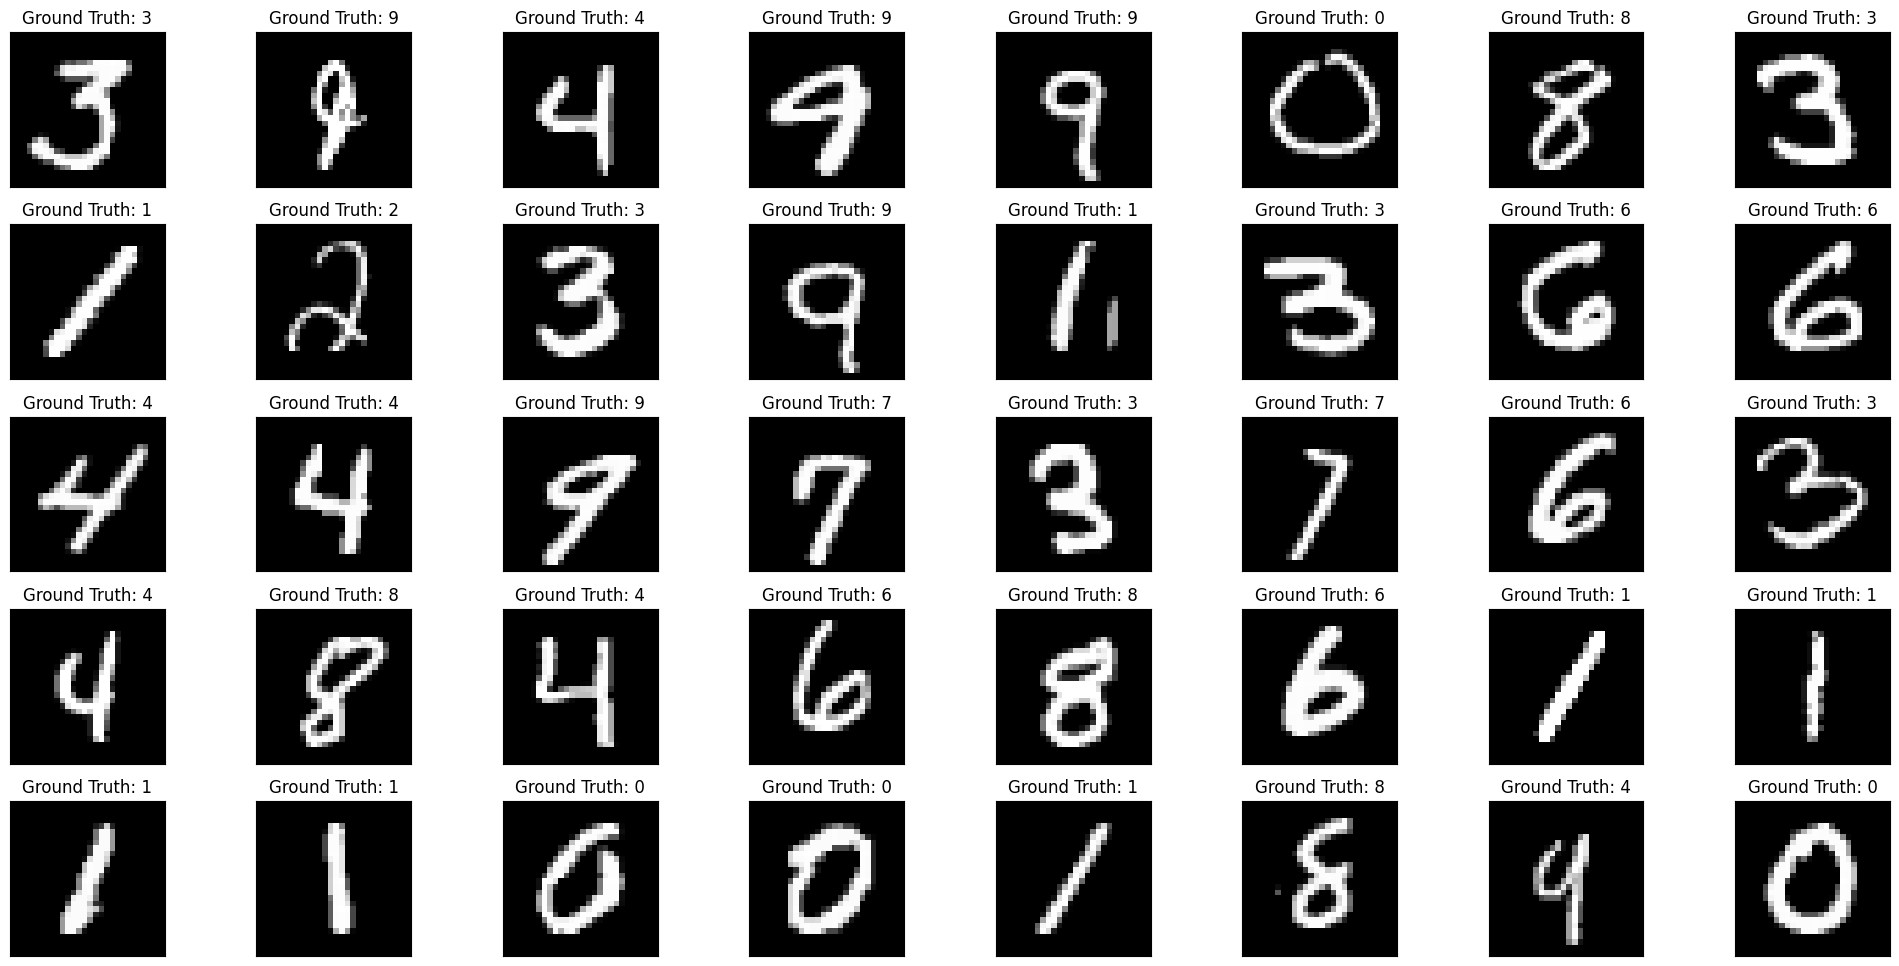

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

We will subsequently use the training data for training, and the test data for estimating the accuracy of our training. The next step is to define a convolutional neural network.

**Usage** of AI: *COMMENT HERE*

GPT read the documentaion files.

### 8.4 Building a CNN (5 points)

1. (4 points) Below you can see a diagram for a convolutional network, similar to the one you saw during the lecture. Translate this diagram into a PyTorch model by filling in the `Net` class below. After each max pooling step and after the first dense (linear) layer apply the relu activation function. You should use the modules `nn.Conv2d`, `nn.Linear` and the functions `F.max_pool2d` and `F.relu`.
Check the PyTorch documentation for these functions to see what parameters you must provide.

*Hint: Carefully think about the shapes of the intermediate layers and add padding to the convolutions where necessary, based on the information given below!*

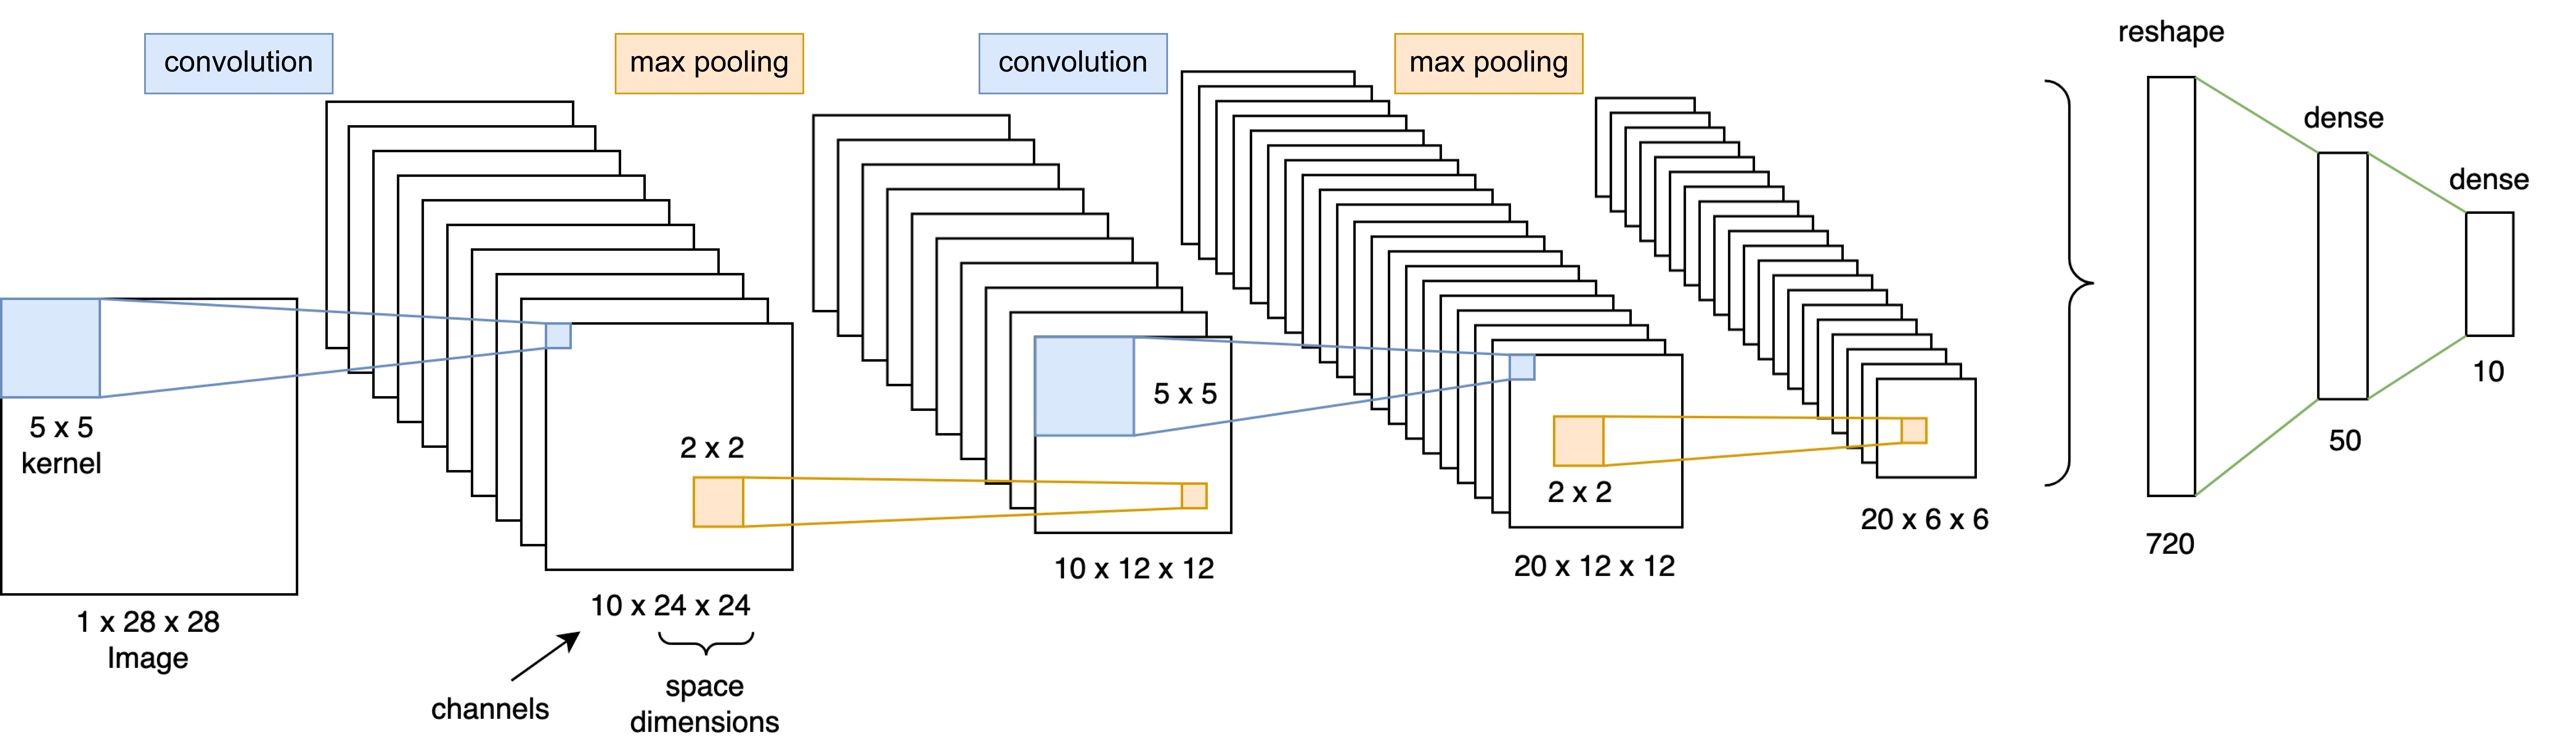

In [24]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # YOUR SOLUTION
        # Convolutional layer 1: input channels = 1, output channels = 10, kernel size = 5x5
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)

        # Convolutional layer 2: input channels = 10, output channels = 20, kernel size = 5x5
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)

        # Fully connected layer 1: input features = 20*4*4, output features = 50
        self.fc1 = nn.Linear(in_features=20 * 4 * 4, out_features=50)

        # Fully connected layer 2: input features = 50, output features = 10
        self.fc2 = nn.Linear(in_features=50, out_features=10)

    def forward(self, x):
        # YOUR SOLUTION
        # Apply convolutional layer 1, followed by ReLU activation and max pooling
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Apply convolutional layer 2, followed by ReLU activation and max pooling
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Flatten the output from the convolutional layers
        x = x.view(-1, 20 * 4 * 4)

        # Apply fully connected layer 1, followed by ReLU activation
        x = F.relu(self.fc1(x))

        # Apply fully connected layer 2
        x = self.fc2(x)

        return x

Now we define the optimizer, and instantiate the network.

In [33]:
learning_rate = 0.001

network = Net().to(DEVICE)  # We move the network to the GPU
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

n_epochs = 2  # 2 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


# This is the main training loop
log_interval = 10
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


# This is the main testing loop
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(DEVICE)
            target = target.to(DEVICE)
            output = network(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

2. (1 point) Write down mathematically how the fraction of correct classifications on the test data is calculated in the above test function.

### Fraction of Correct Classifications

**Predicted Labels**: The predicted labels are obtained by taking the index of the maximum value in the network's output for each sample:
pred_i = argmax_j output_ij
where output_ij is the score for the j-th class of the i-th sample.

**Number of Correctly Classified Samples**: The number of correctly classified samples is calculated as:
correct = sum_{i=1}^N 1(pred_i = target_i)
where 1(pred_i = target_i) is an indicator function that equals 1 if the prediction matches the target and 0 otherwise.

**Accuracy (Fraction of Correct Classifications)**: The accuracy is then calculated as:
Accuracy = correct / N

Where:
- pred_i is the predicted label for the i-th sample.
- output_ij is the output score for the i-th sample and j-th class.
- target_i is the true label for the i-th sample.
- N is the total number of samples in the test dataset.
- 1 is an indicator function that equals 1 when its argument is true and 0 otherwise.



**Usage** of AI: *COMMENT HERE*

GPT did it.

### 8.5 Evaluating the CNN's Performance (3 points)

Now let's do the training!

In [34]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.3029, Accuracy: 976/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309356
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.146047
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.649452
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.971897
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.541902
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.393877
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.569181
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.456788
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.639141
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.268232
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.503703
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.348533
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.256162
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.169230
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.250749
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.279068
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.349738
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.086855
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.279467
Train Epoch: 1 [12160/

Let's plot the training curve.

Text(0, 0.5, 'negative log likelihood loss')

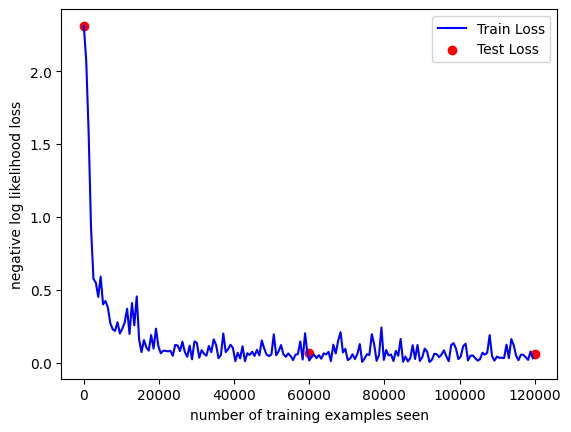

In [28]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Let's again look at a few examples as we did earlier in Section 9.1.2 and compare the model's output.

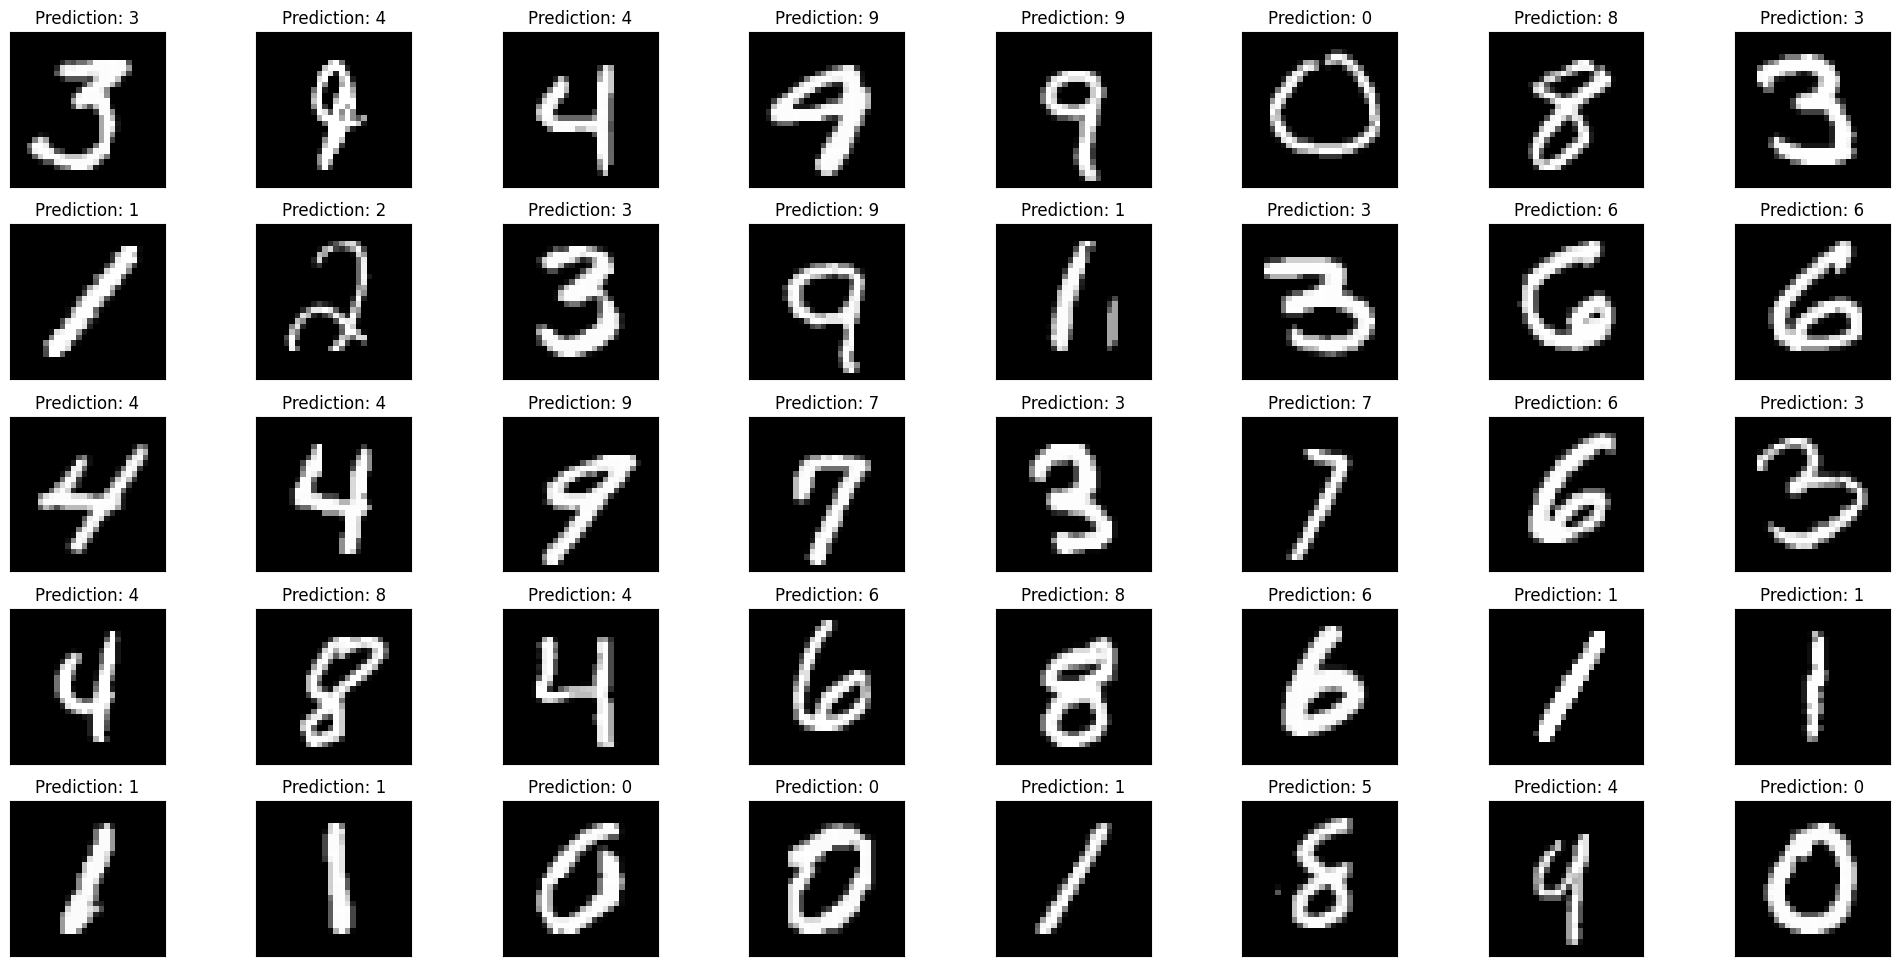

In [29]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

1. (0.5 points) Run the above code and confirm that it has an accuracy of 98% or so. Explain why the initial accuracy is around 10%.

YOUR SOLUTION

2. (2.5 points) Let's compare this to a one-layer perceptron (i.e. no hidden layers). Write a new `class Net` that flattens the 28 x 28 images, passes them through one fully connected linear layer with input size 28 times 28 and outputs a 10 dimensional one-hot vector. What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before.

In [30]:
#Your code here

YOUR SOLUTION

**Usage** of AI: *COMMENT HERE*